<a href="https://colab.research.google.com/github/agamduggal/Tesla-Stock-Price-Prediction-using-Facebook-Prophet/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all required libraries
2. Importing the Yahoo Finance dataset
3. Utilizing Plotly express for data visualisation
4. Preparing Data for Modeling
5. Creating Facebook Prophet Model
6. Forecasting Stocks data for next 30 days
7. Downlaoding the predicted data

# Importing all required libraries

In [ ]:
# Necessary libraries: pandas, prophet, plotly
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.deafult='colab'

# Data Gathering

In [6]:
stock_data_df= pd.read_csv('/content/TSLA.csv')

In [7]:
stock_data_df['Date'].min()

'2010-07-01'

In [8]:
stock_data_df['Date'].max()

'2021-10-14'

In [9]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [10]:
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


# Data Visualization using plotly express

In [11]:
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [12]:
px.line(stock_data_df, x='Date', y='Close')

In [13]:

# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [14]:
px.bar(stock_data_df, y='Volume', color_discrete_sequence=['red'])

In [15]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

# Data preparation

In [16]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [17]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2010-07-01,4.392000
1,2010-07-02,3.840000
2,2010-07-06,3.222000
3,2010-07-07,3.160000
4,2010-07-08,3.492000
...,...,...
2838,2021-10-08,785.489990
2839,2021-10-11,791.940002
2840,2021-10-12,805.719971
2841,2021-10-13,811.080017


In [18]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2010-07-01,4.392000
1,2010-07-02,3.840000
2,2010-07-06,3.222000
3,2010-07-07,3.160000
4,2010-07-08,3.492000
...,...,...
2838,2021-10-08,785.489990
2839,2021-10-11,791.940002
2840,2021-10-12,805.719971
2841,2021-10-13,811.080017


# Creating Facebook Prophet Model

In [19]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zuon8vd/ydvqtvaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zuon8vd/rchf7ae_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82158', 'data', 'file=/tmp/tmp4zuon8vd/ydvqtvaa.json', 'init=/tmp/tmp4zuon8vd/rchf7ae_.json', 'output', 'file=/tmp/tmp4zuon8vd/prophet_modelhuvdesl8/prophet_model-20250111122319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Model Prediction and Forecasting

In [20]:
# Here, model will do forecasting for 1 month as daily data is passed therefore periods=30 means 30 days
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-07-01,1.954075,-57.408706,49.152372,1.954075,1.954075,-6.794706,-6.794706,-6.794706,-0.656288,-0.656288,-0.656288,-6.138419,-6.138419,-6.138419,0.0,0.0,0.0,-4.840631
1,2010-07-02,1.964844,-61.812120,55.083629,1.964844,1.964844,-6.715525,-6.715525,-6.715525,-1.053516,-1.053516,-1.053516,-5.662009,-5.662009,-5.662009,0.0,0.0,0.0,-4.750680
2,2010-07-06,2.007922,-61.778863,56.370459,2.007922,2.007922,-4.337770,-4.337770,-4.337770,-0.337442,-0.337442,-0.337442,-4.000327,-4.000327,-4.000327,0.0,0.0,0.0,-2.329848
3,2010-07-07,2.018691,-62.990789,52.312418,2.018691,2.018691,-3.853903,-3.853903,-3.853903,-0.179671,-0.179671,-0.179671,-3.674232,-3.674232,-3.674232,0.0,0.0,0.0,-1.835212
4,2010-07-08,2.029461,-57.721284,54.686935,2.029461,2.029461,-4.049473,-4.049473,-4.049473,-0.656288,-0.656288,-0.656288,-3.393185,-3.393185,-3.393185,0.0,0.0,0.0,-2.020012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2021-11-09,841.518809,774.351764,887.465245,841.518809,841.518809,-8.645546,-8.645546,-8.645546,-0.337442,-0.337442,-0.337442,-8.308104,-8.308104,-8.308104,0.0,0.0,0.0,832.873262
2869,2021-11-10,842.534708,779.553002,891.538156,842.534708,842.534708,-8.311529,-8.311529,-8.311529,-0.179671,-0.179671,-0.179671,-8.131858,-8.131858,-8.131858,0.0,0.0,0.0,834.223178
2870,2021-11-11,843.550606,779.555503,895.514928,843.550606,843.550606,-8.542378,-8.542378,-8.542378,-0.656288,-0.656288,-0.656288,-7.886090,-7.886090,-7.886090,0.0,0.0,0.0,835.008228
2871,2021-11-12,844.566505,778.449140,891.317138,844.566505,844.566505,-8.624694,-8.624694,-8.624694,-1.053516,-1.053516,-1.053516,-7.571178,-7.571178,-7.571178,0.0,0.0,0.0,835.941811


In [22]:
px.line(forecast, x='ds', y='yhat')

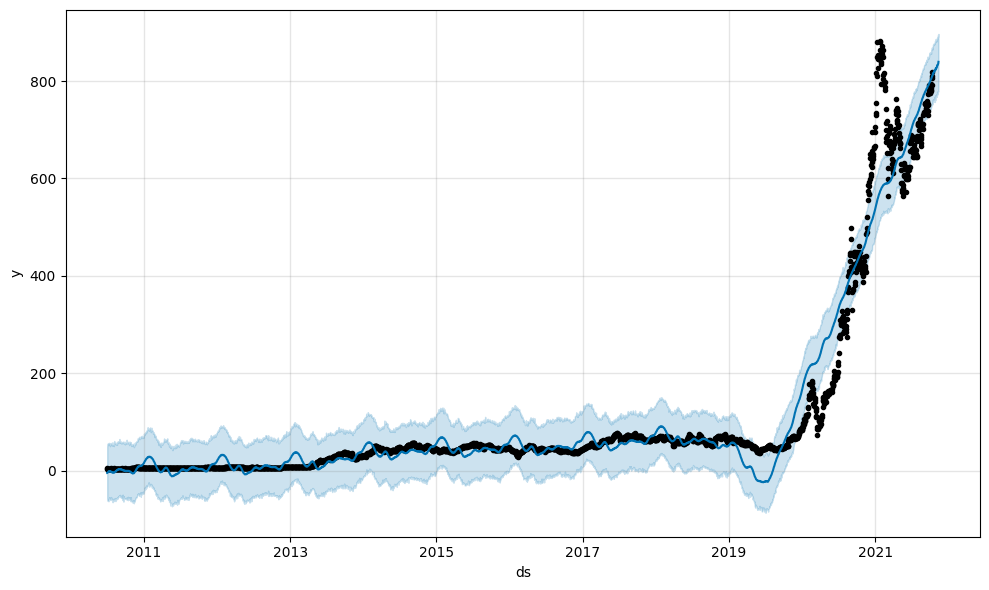

In [23]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is the actual price of tesla and blue is the forecasted price

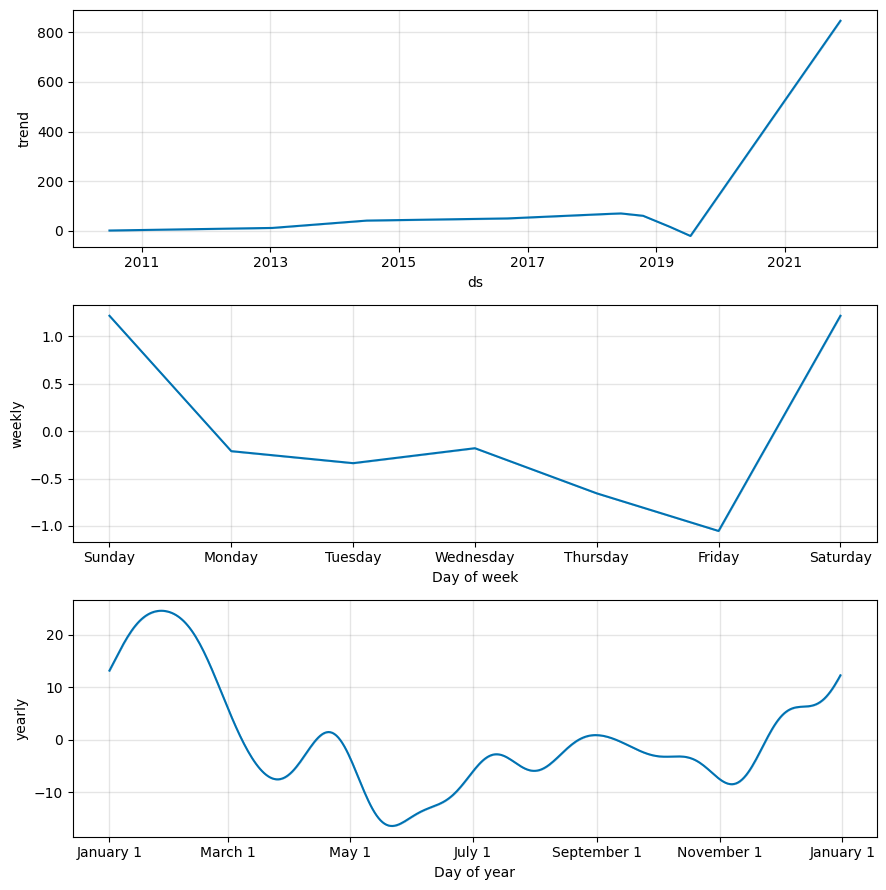

In [24]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)

# Downloading the Forecast data

In [25]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>